In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn

In [2]:
#Загружаем бибилиотеки, читаем датасет, выводим первые 5кв

import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Merged file.csv", sep=";")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,"residential_complex,,,,"
0,VESPER,developer,https://www.cian.ru/sale/flat/286258299/,Москва,sale,flat,5,9,2,104.2,...,-1,"Без отделки, чистовая с мебелью",-1,28 м²,+74951387184,Тверской,1-я Тверская-Ямская,2,Маяковская,"Vesper Tverskaya,,,"
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/272003903/,Москва,sale,flat,5,6,2,43.0,...,-1,-1,-1,-1,+79197672046,Беговой,3-я Ямского Поля,9,Белорусская,"Art Residence,,,,"
2,PROНЕДВИЖИМОСТЬ,real_estate_agent,https://www.cian.ru/sale/flat/308789447/,Москва,sale,flat,11,12,1,33.5,...,-1,-1,17 м²,7 м²,+79163568699,Чертаново Южное,3-й Дорожный проезд,6К1,Улица Академика Янгеля,",,,,"
3,ANT Development,developer,https://www.cian.ru/sale/flat/303519421/,Москва,sale,flat,2,10,2,59.8,...,-1,Чистовая,-1,-1,+74951346248,Дорогомилово,NaN,3к8,Поклонная,"Виктори Парк Резиденсез ЖК,,,,"
4,Kalinka Group,real_estate_agent,https://www.cian.ru/sale/flat/308553708/,Москва,sale,flat,9,12,2,88.0,...,-1,-1,-1,10 м²,+79057198567,Тверской,2-я Брестская,6,Маяковская,"Резиденция Тверская,,,,"


In [3]:
df.info()
#Выводим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4130 entries, 0 to 4129
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   author                   4090 non-null   object
 1   author_type              4089 non-null   object
 2   url                      4129 non-null   object
 3   location                 4129 non-null   object
 4   deal_type                4129 non-null   object
 5   accommodation_type       4129 non-null   object
 6   floor                    4129 non-null   object
 7   floors_count             4129 non-null   object
 8   rooms_count              4129 non-null   object
 9   total_meters             4129 non-null   object
 10  price                    4092 non-null   object
 11  year_of_construction     1929 non-null   object
 12  object_type              3646 non-null   object
 13  house_material_type      3860 non-null   object
 14  heating_type             4098 non-null  

In [4]:
df.drop_duplicates(inplace=True)
df.drop(['author'], axis=1,inplace=True)

print(f"стало {df.shape[1]} колонок и {df.shape[0]} строк")
#Удаляем дубликаты и удаляем автора, выводим сколько стало колонок и строк 

стало 23 колонок и 4012 строк


# Удаление NAN

<Axes: >

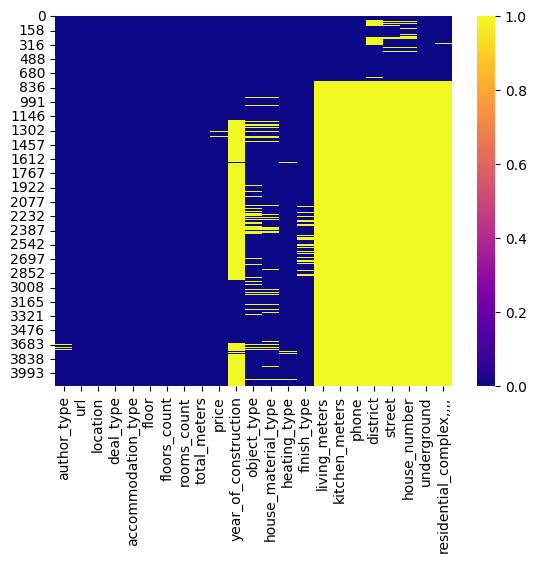

In [5]:
sns.heatmap(df.isnull(), cmap = "plasma") #отображает нулевые значения


In [6]:
print(df["district"].isnull().sum(),"-nulls in district")
print(df["underground"].isnull().sum(),"-nulls in underground")
print(df["street"].isnull().sum(),"-nulls in street")
#Выводим сколько нулей в данный колонках

3474 -nulls in district
3316 -nulls in underground
3393 -nulls in street


In [7]:
df['district'].fillna(df['location'], inplace=True)


df.drop(['house_number'], axis=1,inplace=True)
df = df.dropna()

#Код заполняет пропущенные значения, используя значения из других столбцов.

#Затем удаляется столбец house_number.

#Удаляются все строки, содержащие пропущенные значения.



/var/folders/4t/3s48rnls07dfkhjb3kmg1b900000gn/T/ipykernel_9180/1119913700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['district'].fillna(df['location'], inplace=True)


Район пуст почти во всех подмосковных строках. Ставим район=локация, и так по уменьшению для всего датафрейма. Остальное незначительно 

<Axes: >

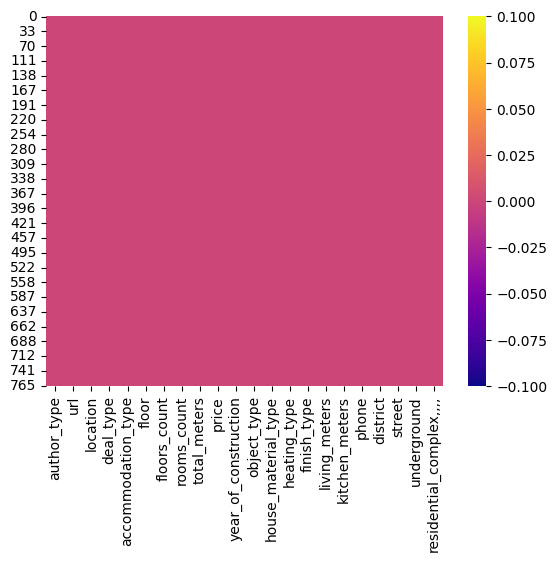

In [8]:
sns.heatmap(df.isnull(), cmap = "plasma")

# Приведение типов

In [9]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors_count'] = pd.to_numeric(df['floors_count'], errors='coerce')
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='coerce')
#Переводим обьекты в числа если не может ставит nan


Перевод данных которые должны быть численными


In [10]:
df['price_for_metr'] = round((df['price'] / df['total_meters']), 3)
df["price_for_metr"]

0      1448740.883
1       625581.395
2       238805.970
4       674431.818
5       181818.182
          ...     
761    1300075.586
762    1008823.529
763     786945.813
764    1306122.449
765     524193.548
Name: price_for_metr, Length: 601, dtype: float64

## Поиск выбросов

Цена за метр квадратный

In [11]:
print(df.loc[df['price_for_metr'].idxmax()])
print(df.loc[df['floors_count'].idxmax()])
print(df.loc[df['rooms_count'].idxmax()])

author_type                                       real_estate_agent
url                        https://www.cian.ru/sale/flat/307000211/
location                                                     Москва
deal_type                                                      sale
accommodation_type                                             flat
floor                                                           2.0
floors_count                                                    7.0
rooms_count                                                     3.0
total_meters                                                  137.1
price                                                   650000000.0
year_of_construction                                             -1
object_type                                                      -1
house_material_type                                              -1
heating_type                                                     -1
finish_type                                     

In [12]:
df.drop(([df['rooms_count'].idxmax()]), axis = 0, inplace=True)
print(df.loc[df['rooms_count'].idxmax()])

author_type                                       real_estate_agent
url                        https://www.cian.ru/sale/flat/305881561/
location                                                     Москва
deal_type                                                      sale
accommodation_type                                             flat
floor                                                           3.0
floors_count                                                    9.0
rooms_count                                                     4.0
total_meters                                                  142.5
price                                                   108900000.0
year_of_construction                                             -1
object_type                                                      -1
house_material_type                                              -1
heating_type                                                     -1
finish_type                                     

Нашлось очень много сломанных строк

In [13]:
print(f"было {df.shape[0]} строк")
df.drop(df[df['rooms_count'] > 10].index, inplace=True)
print(f"стало {df.shape[0]} строк")
print(df.loc[df['rooms_count'].idxmax()])
#Код сначала выводит количество строк в DataFrame до удаления.

#Затем удаляются все строки, где количество комнат больше 10.

#После удаления снова выводится количество строк.

#Выводится строка с максимальным количеством комнат в оставшемся DataFrame.



было 600 строк
стало 600 строк
author_type                                       real_estate_agent
url                        https://www.cian.ru/sale/flat/305881561/
location                                                     Москва
deal_type                                                      sale
accommodation_type                                             flat
floor                                                           3.0
floors_count                                                    9.0
rooms_count                                                     4.0
total_meters                                                  142.5
price                                                   108900000.0
year_of_construction                                             -1
object_type                                                      -1
house_material_type                                              -1
heating_type                                                     -1
finish_type      

Выбросы устранены!!!!! Победа

# Анализ

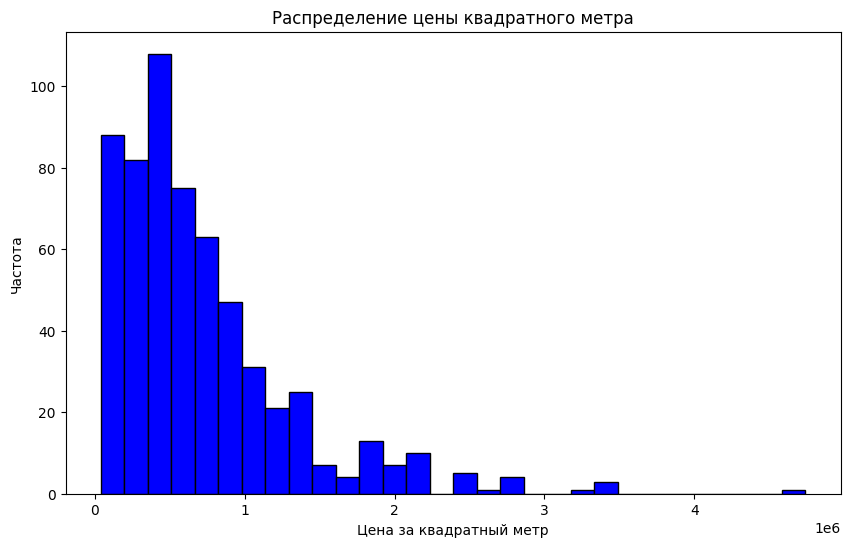

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_for_metr'], bins=30, color='blue', edgecolor='black')
plt.title('Распределение цены квадратного метра')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
plt.show()


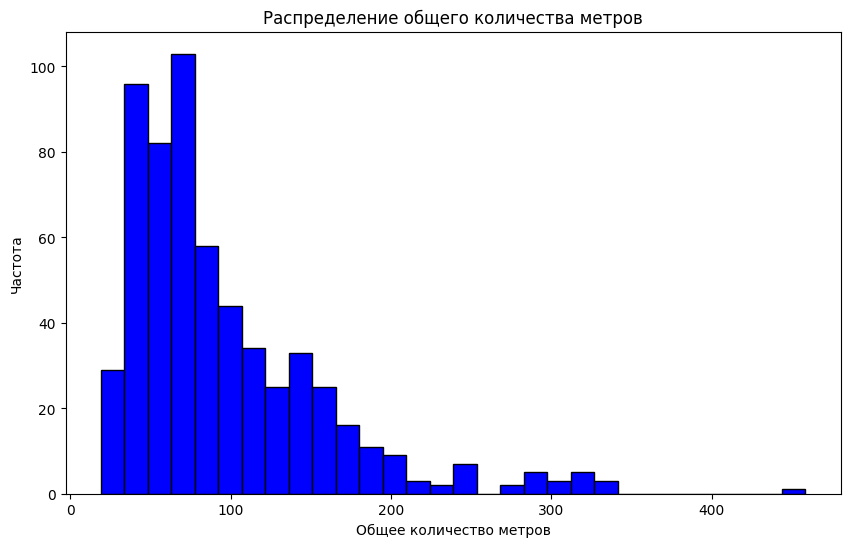

In [15]:
# Пример для признака 'total_sqm' (общее количество метров)
plt.figure(figsize=(10, 6))
plt.hist(df['total_meters'], bins=30, color='blue', edgecolor='black')
plt.title('Распределение общего количества метров')
plt.xlabel('Общее количество метров')
plt.ylabel('Частота')
plt.show()

Самые частые 50-70 метров. реалистично (обычная двушка)

In [16]:
print(df.loc[df['total_meters'].idxmax()])

author_type                                               developer
url                        https://www.cian.ru/sale/flat/294775310/
location                                                     Москва
deal_type                                                      sale
accommodation_type                                             flat
floor                                                           8.0
floors_count                                                    8.0
rooms_count                                                     4.0
total_meters                                                  458.3
price                                                   723197400.0
year_of_construction                                           2023
object_type                                                      -1
house_material_type                             Монолитно-кирпичный
heating_type                                                     -1
finish_type                                   Бе

Реально 460м. квартира(проверено)

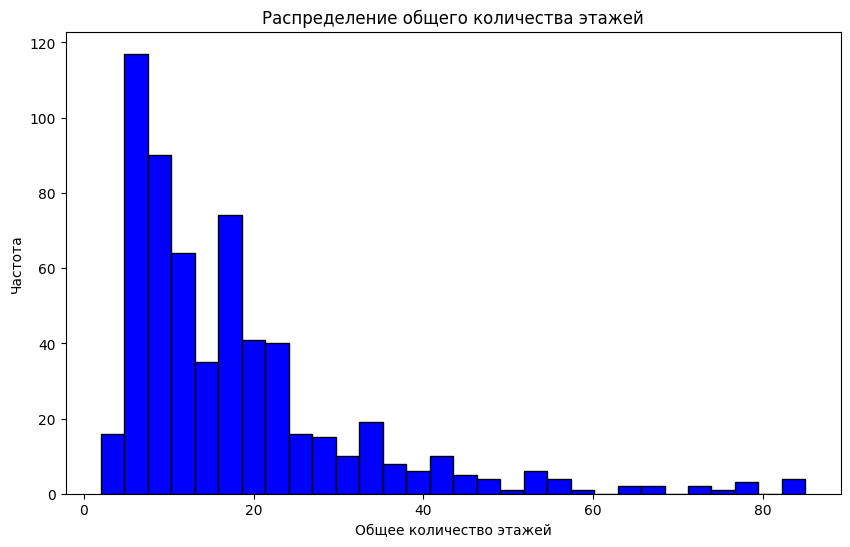

In [17]:

plt.figure(figsize=(10, 6))
plt.hist(df['floors_count'], bins=30, color='blue', edgecolor='black')
plt.title('Распределение общего количества этажей')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')
plt.show()

Чаще всего встречаются 5-9 этажные здания. График выглядит реалистично. 

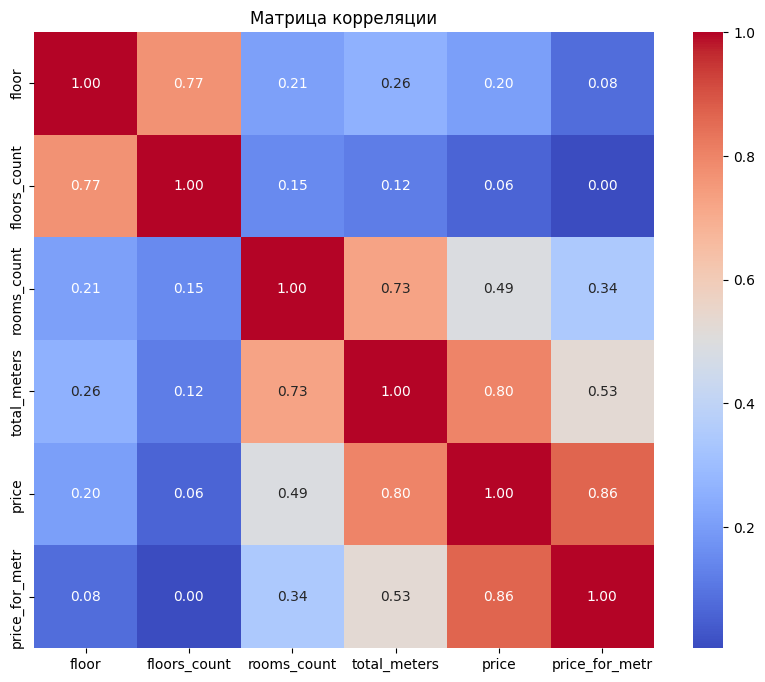

In [18]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

На целевую переменную сильно влияют цена и площадь квартиры, чуть меньше влияет количество комнат. На цену влияют площадь и колво комнат. этаж коррелируют количество этажей. Площадь коррелирует с колвом комнат и ценой.



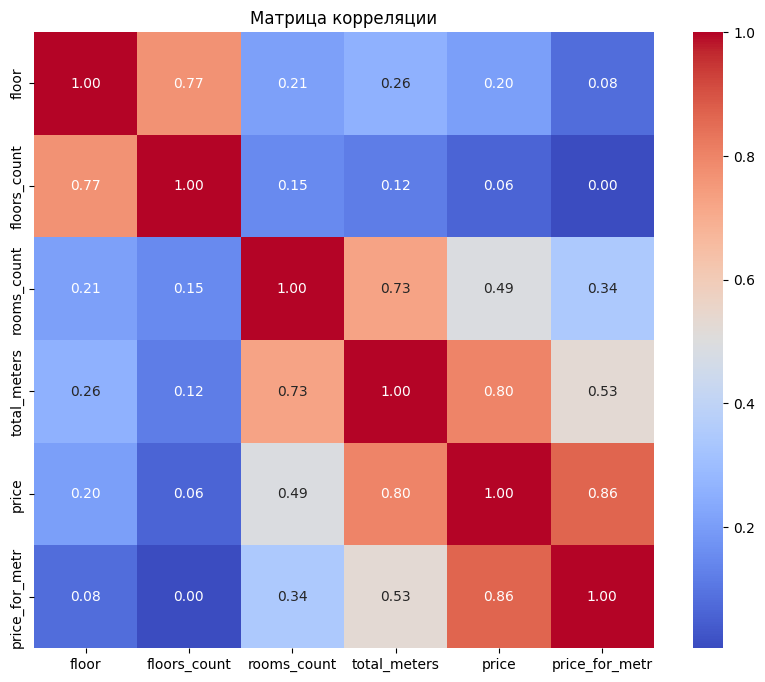

In [19]:
numeric_cols = ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'price_for_metr']

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()